# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Importing Data

In [2]:
data = pd.read_csv("Breast_Cancer_Wisconsin.csv")
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.isnull(), df.sum()

(        id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    False      False        False         False           False      False   
 1    False      False        False         False           False      False   
 2    False      False        False         False           False      False   
 3    False      False        False         False           False      False   
 4    False      False        False         False           False      False   
 ..     ...        ...          ...           ...             ...        ...   
 564  False      False        False         False           False      False   
 565  False      False        False         False           False      False   
 566  False      False        False         False           False      False   
 567  False      False        False         False           False      False   
 568  False      False        False         False           False      False   
 
      smoothness_mean  compactness_mea

###  Result
One of the columns has a missing value

In [5]:
df2 = df.drop('Unnamed: 32', axis=1)

### Result
Looking at the data above, we can see that the max data is far from the mean data, but we cannot consider these data as noise because the owner of the dataset said that these data are real.

# Ratio of columns

In [6]:
df3 = df2.drop('id', axis=1)
df3

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
count_M = df[df['diagnosis']== 'M'].shape[0]
count_B = df[df['diagnosis']== 'B'].shape[0]
count_total = df.shape[0]

persentage_M = (count_M/count_total)*100
persentage_B = (count_B/count_total)*100

print(f'M = {round(persentage_M,2)}')
print(f'B = {round(persentage_B,2)}')

M = 37.26
B = 62.74


In [8]:
numeric_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
                    'fractal_dimension_mean']

mean_ratios={}

for features in numeric_features:
    means_by_diagnosis = df.groupby('diagnosis')[features].mean()
    mean_ratio = means_by_diagnosis['M'] / means_by_diagnosis['B']

    mean_ratios[features]= round(mean_ratio, 2)

    print(mean_ratios)


{'radius_mean': 1.44}
{'radius_mean': 1.44, 'texture_mean': 1.21}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48, 'area_mean': 2.11}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48, 'area_mean': 2.11, 'smoothness_mean': 1.11}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48, 'area_mean': 2.11, 'smoothness_mean': 1.11, 'compactness_mean': 1.81}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48, 'area_mean': 2.11, 'smoothness_mean': 1.11, 'compactness_mean': 1.81, 'concavity_mean': 3.49}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48, 'area_mean': 2.11, 'smoothness_mean': 1.11, 'compactness_mean': 1.81, 'concavity_mean': 3.49, 'concave points_mean': 3.42}
{'radius_mean': 1.44, 'texture_mean': 1.21, 'perimeter_mean': 1.48, 'area_mean': 2.11, 'smoothness_mean': 1.11, 'compactness_mean': 1.81, 'concavity_mean': 3.49, 'concave point

In [9]:
mean_ratio = df.groupby('diagnosis').mean()
mean_ratio = mean_ratio.loc['M'] / mean_ratio.loc['B']
mean=dict(mean_ratio)
print("Mean Ratio:\n")
for i,r in enumerate(mean.items()):
    print(f'{r[0]}: {round(r[1]*10,2)}%')

Mean Ratio:

id: 13.87%
radius_mean: 14.38%
texture_mean: 12.06%
perimeter_mean: 14.78%
area_mean: 21.14%
smoothness_mean: 11.13%
compactness_mean: 18.13%
concavity_mean: 34.91%
concave points_mean: 34.21%
symmetry_mean: 11.07%
fractal_dimension_mean: 9.97%
radius_se: 21.44%
texture_se: 9.92%
perimeter_se: 21.62%
area_se: 34.38%
smoothness_se: 9.42%
compactness_se: 15.06%
concavity_se: 16.09%
concave points_se: 15.28%
symmetry_se: 9.95%
fractal_dimension_se: 11.17%
radius_worst: 15.8%
texture_worst: 12.47%
perimeter_worst: 16.25%
area_worst: 25.45%
smoothness_worst: 11.59%
compactness_worst: 20.52%
concavity_worst: 27.11%
concave points_worst: 24.48%
symmetry_worst: 11.97%
fractal_dimension_worst: 11.52%
Unnamed: 32: nan%


In [10]:
count_ratio = df['diagnosis'].value_counts(normalize=True)
r=dict(round(count_ratio*100,2))
print("\nCount Ratio (Malignant to Benign):\n" )
for i,c in enumerate(r.items()):
    print(f'{c[0]} : {c[1]}%')


Count Ratio (Malignant to Benign):

B : 62.74%
M : 37.26%


In [11]:
count_benign = len(df[df['diagnosis'] == 'B'])
count_malignant = len(df[df['diagnosis'] == 'M'])


prob_benign = count_benign / len(df)
prob_malignant = count_malignant / len(df)


probability_ratio = prob_malignant / prob_benign

print("Probability Ratio (Malignant / Benign):", round(probability_ratio*100,2),'%')

Probability Ratio (Malignant / Benign): 59.38 %


In [12]:
median_benign = np.median(df[df['diagnosis'] == 'B']['area_mean'])
median_malignant = np.median(df[df['diagnosis'] == 'M']['area_mean'])


median_ratio = round((median_malignant / median_benign)*10,2)


mode_benign = df[df['diagnosis'] == 'B']['area_mean'].mode()[0]
mode_malignant = df[df['diagnosis'] == 'M']['area_mean'].mode()[0]


mode_ratio = round((mode_malignant / mode_benign)*10,2)


variance_benign = np.var(df[df['diagnosis'] == 'B']['area_mean'])
variance_malignant = np.var(df[df['diagnosis'] == 'M']['area_mean'])


variance_ratio = round((variance_malignant / variance_benign)*10,2)


quartiles_benign = np.percentile(df[df['diagnosis'] == 'B']['area_mean'], [25, 50, 75])
quartiles_malignant = np.percentile(df[df['diagnosis'] == 'M']['area_mean'], [25, 50, 75])


quartile_ratio = quartiles_malignant / quartiles_benign


print(f"Median Ratio (Malignant / Benign): {median_ratio}%")
print(f"Mode Ratio (Malignant / Benign): {mode_ratio}%")
print(f"Variance Ratio (Malignant / Benign): {variance_ratio}%")
print("Quartile Ratio (Malignant / Benign):")
print(f'25% : {round(quartile_ratio[0]*10,2)}%')
print(f'50% : {round(quartile_ratio[1]*10,2)}%')
print(f'75% : {round(quartile_ratio[2]*10,2)}%')

Median Ratio (Malignant / Benign): 20.33%
Mode Ratio (Malignant / Benign): 13.99%
Variance Ratio (Malignant / Benign): 74.93%
Quartile Ratio (Malignant / Benign):
25% : 18.65%
50% : 20.33%
75% : 21.84%


# Overview of data columns

# Modeling

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns 


In [14]:
X0 = df2[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y0 = df2['diagnosis']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_train)

model_names=[]
acc_test=[]
acc_train=[]
pre=[]
re=[]
f1=[]
y_pr=[]

c:\Users\shaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Naive bayes

Accuracy (train)_1: 90.99%
Accuracy (test)_1: 93.86%
Precision_1: 95.00%
Recall_1: 88.37%
F1 Score_1: 91.57%
Confusion Matrix_1:
[[69  2]
 [ 5 38]]


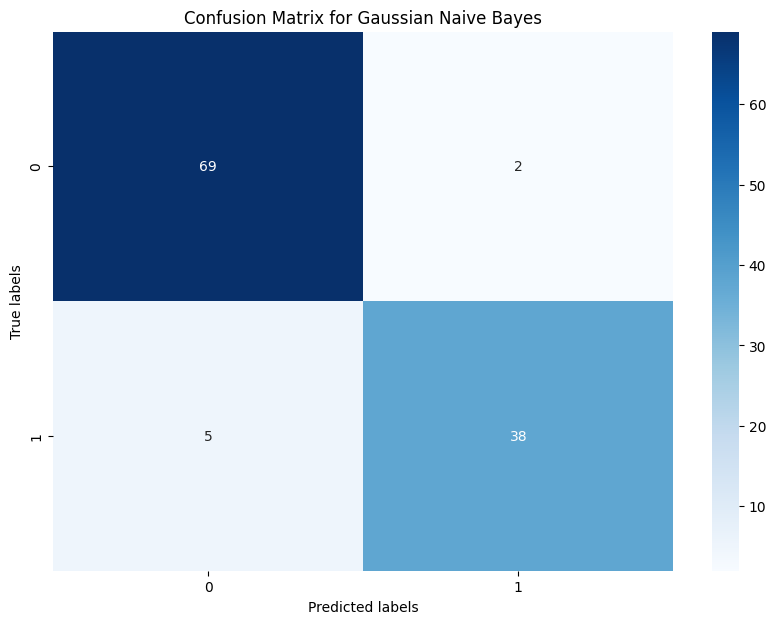

In [15]:
X0 = df2[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y0 = df2['diagnosis']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y0)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred_train_1 = gnb.predict(X_train)
y_pred_test_1 = gnb.predict(X_test)

# Calculate metrics
acc_train_1 = accuracy_score(y_train, y_pred_train_1) * 100
acc_test_1 = accuracy_score(y_test, y_pred_test_1) * 100
precision_1 = precision_score(y_test, y_pred_test_1) * 100
recall_1 = recall_score(y_test, y_pred_test_1) * 100
f1_1 = f1_score(y_test, y_pred_test_1) * 100
conf_matrix_1 = confusion_matrix(y_test, y_pred_test_1)

# Print metrics
print(f'Accuracy (train)_1: {acc_train_1:.2f}%')
print(f'Accuracy (test)_1: {acc_test_1:.2f}%')
print(f'Precision_1: {precision_1:.2f}%')
print(f'Recall_1: {recall_1:.2f}%')
print(f'F1 Score_1: {f1_1:.2f}%')
print(f'Confusion Matrix_1:\n{conf_matrix_1}')

model_names.append("GaussianNB")
acc_test.append(acc_test_1)
acc_train.append(acc_train_1)
pre.append(precision_1)
re.append(recall_1)
f1.append(f1_1)
y_pr.append(y_pred_test_1)
conf_matrix = confusion_matrix(y_test, y_pred_test_1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for Gaussian Naive Bayes')
plt.show()


## Random forest classifier

Accuracy (train)_2: 100.00%
Accuracy (test)_2: 95.61%
Precision_2: 95.24%
Recall_2: 93.02%
F1 Score_2: 94.12%
Confusion Matrix_2:
[[69  2]
 [ 3 40]]


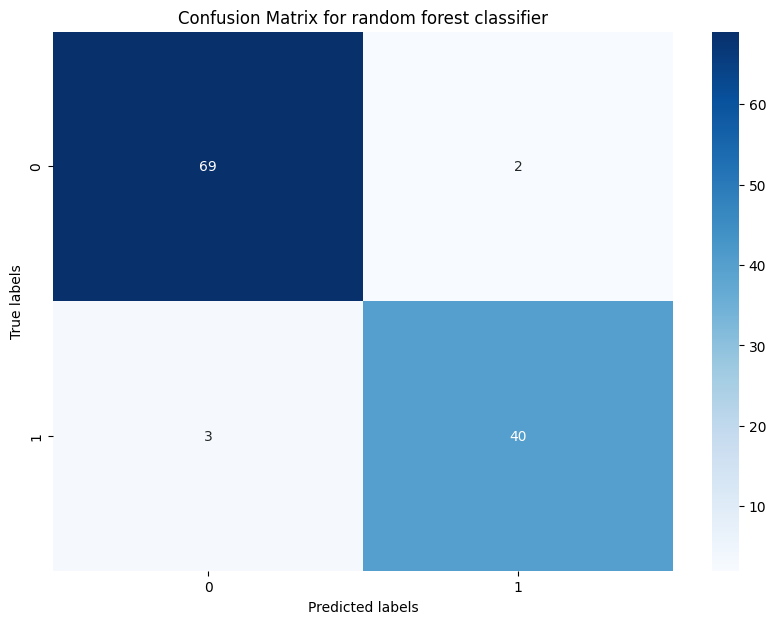

In [16]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)

rf.fit(X_train, y_train)

y_pred_train_2 = rf.predict(X_train)
y_pred_test_2 = rf.predict(X_test)

acc_train_2 = accuracy_score(y_train, y_pred_train_2) * 100
acc_test_2 = accuracy_score(y_test, y_pred_test_2) * 100
precision_2 = precision_score(y_test, y_pred_test_2) * 100
recall_2 = recall_score(y_test, y_pred_test_2) * 100
f1_2 = f1_score(y_test, y_pred_test_2) * 100
conf_matrix_2 = confusion_matrix(y_test, y_pred_test_2)

# Print metrics
print(f'Accuracy (train)_2: {acc_train_2:.2f}%')
print(f'Accuracy (test)_2: {acc_test_2:.2f}%')
print(f'Precision_2: {precision_2:.2f}%')
print(f'Recall_2: {recall_2:.2f}%')
print(f'F1 Score_2: {f1_2:.2f}%')
print(f'Confusion Matrix_2:\n{conf_matrix_2}')

model_names.append('RandomForestClassifier')
acc_test.append(acc_test_2)
acc_train.append(acc_train_2)
pre.append(precision_2)
re.append(recall_2)
f1.append(f1_2)
y_pr.append(y_pred_test_2)
conf_matrix = confusion_matrix(y_test, y_pred_test_2)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for random forest classifier')
plt.show()

## linear regression

Accuracy (train)_3: 94.29%
Accuracy (test)_3: 93.86%
Precision_3: 92.86%
Recall_3: 90.70%
F1 Score_3: 91.76%
Confusion Matrix_3:
[[68  3]
 [ 4 39]]


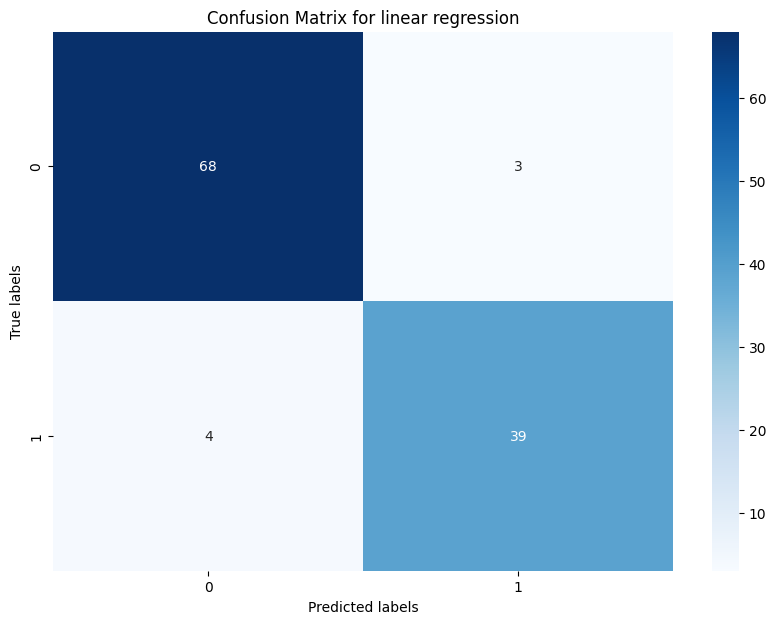

In [17]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

y_pred_train_3 = lg.predict(X_train)
y_pred_test_3 = lg.predict(X_test)

acc_train_3 = accuracy_score(y_train, y_pred_train_3) * 100
acc_test_3 = accuracy_score(y_test, y_pred_test_3) * 100
precision_3 = precision_score(y_test, y_pred_test_3) * 100
recall_3 = recall_score(y_test, y_pred_test_3) * 100
f1_3 = f1_score(y_test, y_pred_test_3) * 100
conf_matrix_3 = confusion_matrix(y_test, y_pred_test_3)

# Print metrics
print(f'Accuracy (train)_3: {acc_train_3:.2f}%')
print(f'Accuracy (test)_3: {acc_test_3:.2f}%')
print(f'Precision_3: {precision_3:.2f}%')
print(f'Recall_3: {recall_3:.2f}%')
print(f'F1 Score_3: {f1_3:.2f}%')
print(f'Confusion Matrix_3:\n{conf_matrix_3}')

model_names.append('LogisticRegression')
acc_test.append(acc_test_3)
acc_train.append(acc_train_3)
pre.append(precision_3)
re.append(recall_3)
f1.append(f1_3)
y_pr.append(y_pred_test_3)
conf_matrix = confusion_matrix(y_test, y_pred_test_3)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for linear regression')
plt.show()

## decision tree classifier

Accuracy (train)_4: 96.48%
Accuracy (test)_4: 94.74%
Precision_4: 95.12%
Recall_4: 90.70%
F1 Score_4: 92.86%
Confusion Matrix_3:
[[69  2]
 [ 4 39]]


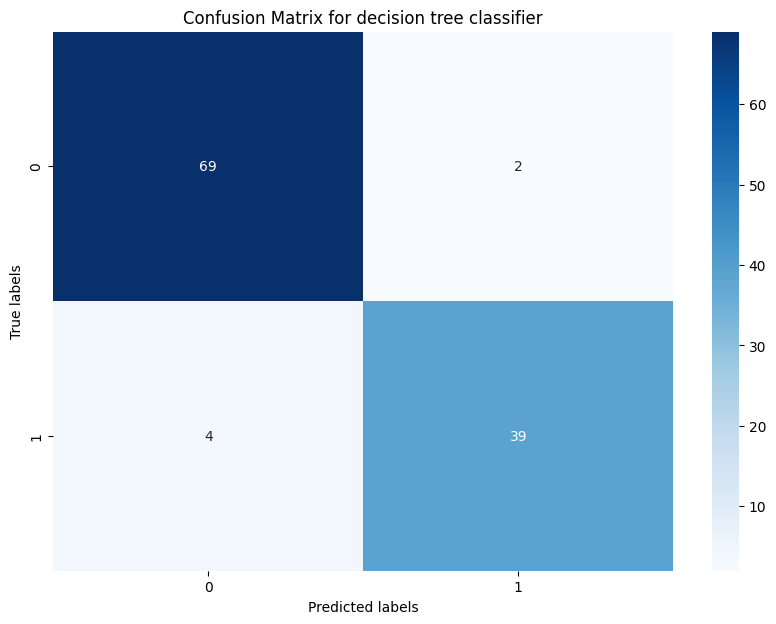

In [18]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=2)

dt.fit(X_train, y_train)

y_pred_train_4 = dt.predict(X_train)
y_pred_test_4 = dt.predict(X_test)

acc_train_4 = accuracy_score(y_train, y_pred_train_4) * 100
acc_test_4 = accuracy_score(y_test, y_pred_test_4) * 100
precision_4 = precision_score(y_test, y_pred_test_4) * 100
recall_4 = recall_score(y_test, y_pred_test_4) * 100
f1_4 = f1_score(y_test, y_pred_test_4) * 100
conf_matrix_4 = confusion_matrix(y_test, y_pred_test_4)

# Print metrics
print(f'Accuracy (train)_4: {acc_train_4:.2f}%')
print(f'Accuracy (test)_4: {acc_test_4:.2f}%')
print(f'Precision_4: {precision_4:.2f}%')
print(f'Recall_4: {recall_4:.2f}%')
print(f'F1 Score_4: {f1_4:.2f}%')
print(f'Confusion Matrix_3:\n{conf_matrix_4}')

model_names.append('DecisionTreeClassifier')
acc_test.append(acc_test_4)
acc_train.append(acc_train_4)
pre.append(precision_4)
re.append(recall_4)
f1.append(f1_4)
y_pr.append(y_pred_test_4)
conf_matrix = confusion_matrix(y_test, y_pred_test_4)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for decision tree classifier')
plt.show()

# KNeighbor classifire

Accuracy (train)_5: 95.16%
Accuracy (test)_5: 97.37%
Precision_5: 100.00%
Recall_5: 93.02%
F1 Score_5: 96.39%
Confusion Matrix_5:
[[71  0]
 [ 3 40]]


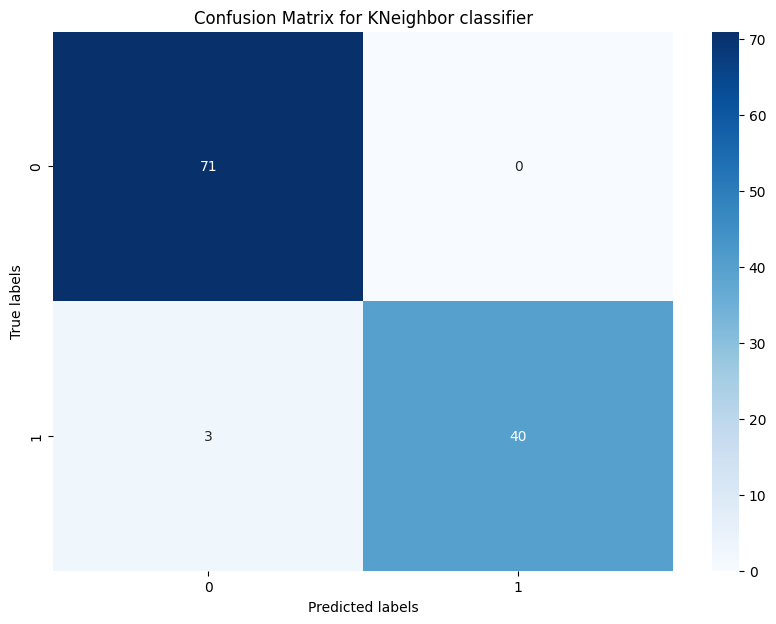

In [19]:
kn = KNeighborsClassifier(n_neighbors=19)

kn.fit(X_train, y_train)

y_pred_train_5 = kn.predict(X_train)
y_pred_test_5 = kn.predict(X_test)

acc_train_5 = accuracy_score(y_train, y_pred_train_5) * 100
acc_test_5 = accuracy_score(y_test, y_pred_test_5) * 100
precision_5 = precision_score(y_test, y_pred_test_5) * 100
recall_5 = recall_score(y_test, y_pred_test_5) * 100
f1_5 = f1_score(y_test, y_pred_test_5) * 100
conf_matrix_5 = confusion_matrix(y_test, y_pred_test_5)

# Print metrics
print(f'Accuracy (train)_5: {acc_train_5:.2f}%')
print(f'Accuracy (test)_5: {acc_test_5:.2f}%')
print(f'Precision_5: {precision_5:.2f}%')
print(f'Recall_5: {recall_5:.2f}%')
print(f'F1 Score_5: {f1_5:.2f}%')
print(f'Confusion Matrix_5:\n{conf_matrix_5}')

model_names.append('KNeighborsClassifier')
acc_test.append(acc_test_5)
acc_train.append(acc_train_5)
pre.append(precision_5)
re.append(recall_5)
f1.append(f1_5)
y_pr.append(y_pred_test_5)
conf_matrix = confusion_matrix(y_test, y_pred_test_5)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for KNeighbor classifier')
plt.show()

# compare

In [20]:

d = {
    'Models': model_names,
    'Accuracy Test': acc_test,
    'Accuracy Train': acc_train,
    'Precision': pre,
    'Recall': re,
    'F1_Score': f1
}
mo_df=pd.DataFrame(d)
mo_df

,Models,Accuracy Test,Accuracy Train,Precision,Recall,F1_Score
0,GaussianNB,93.859649,90.989011,95.000000,88.372093,91.566265
1,RandomForestClassifier,95.614035,100.000000,95.238095,93.023256,94.117647
2,LogisticRegression,93.859649,94.285714,92.857143,90.697674,91.764706
3,DecisionTreeClassifier,94.736842,96.483516,95.121951,90.697674,92.857143
4,KNeighborsClassifier,97.368421,95.164835,100.000000,93.023256,96.385542


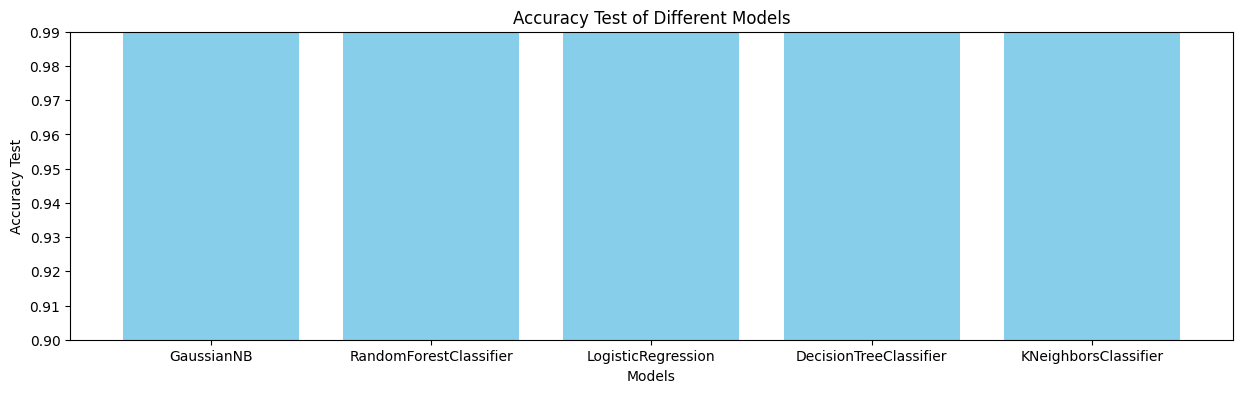

In [21]:
plt.figure(figsize=(15, 4))
plt.bar(model_names, acc_test, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Test')
plt.title('Accuracy Test of Different Models')
plt.ylim(0.90, 0.99)  
plt.show()

Result

In KNN and Decision Tree Classifie models, it has the highest value of Accuracy Test

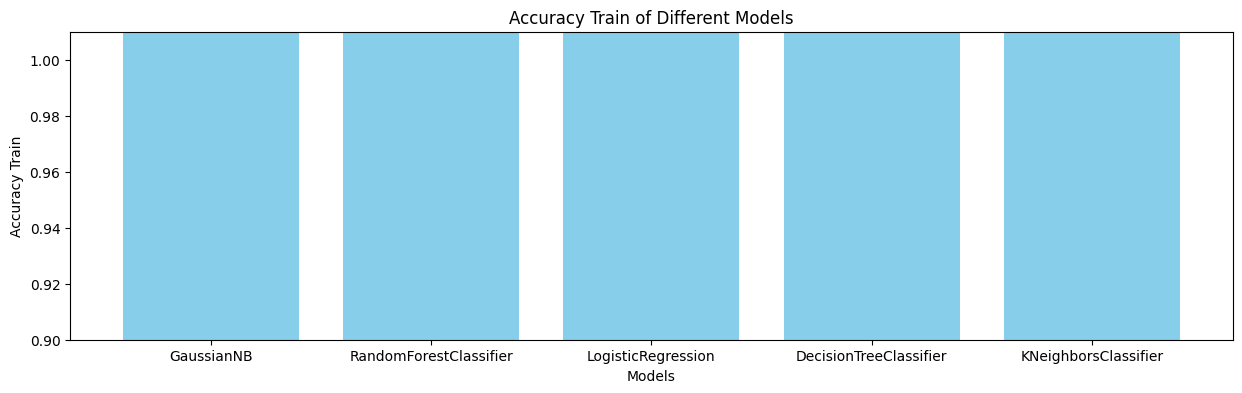

In [22]:
plt.figure(figsize=(15, 4))
plt.bar(model_names, acc_train, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Train')
plt.title('Accuracy Train of Different Models')
plt.ylim(0.90, 1.01)  
plt.show()

Result

In RandomForest model, it has the highest value of Accuracy Train

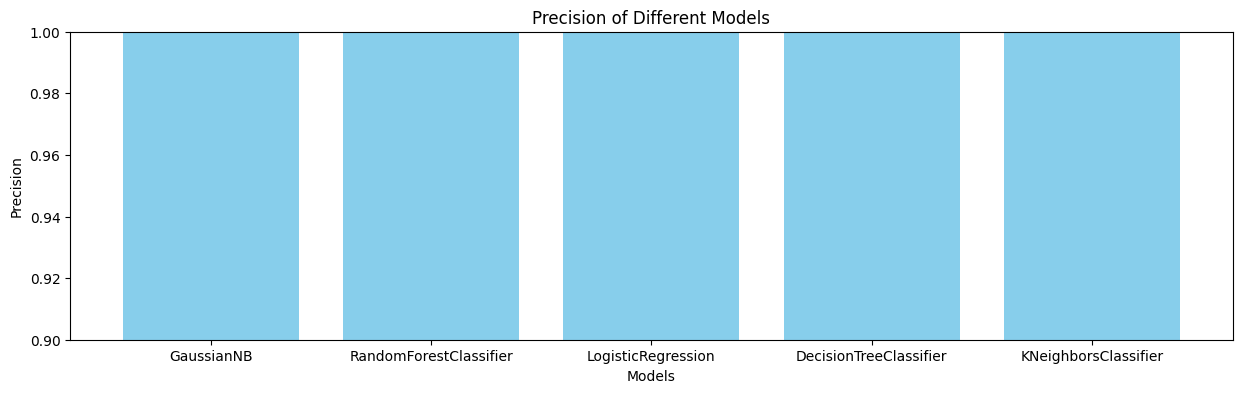

In [23]:
plt.figure(figsize=(15, 4))
plt.bar(model_names, pre, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0.90, 1.0)  
plt.show()

Result

In KNN and Decision Tree Classifier models, it has the highest value of Precision

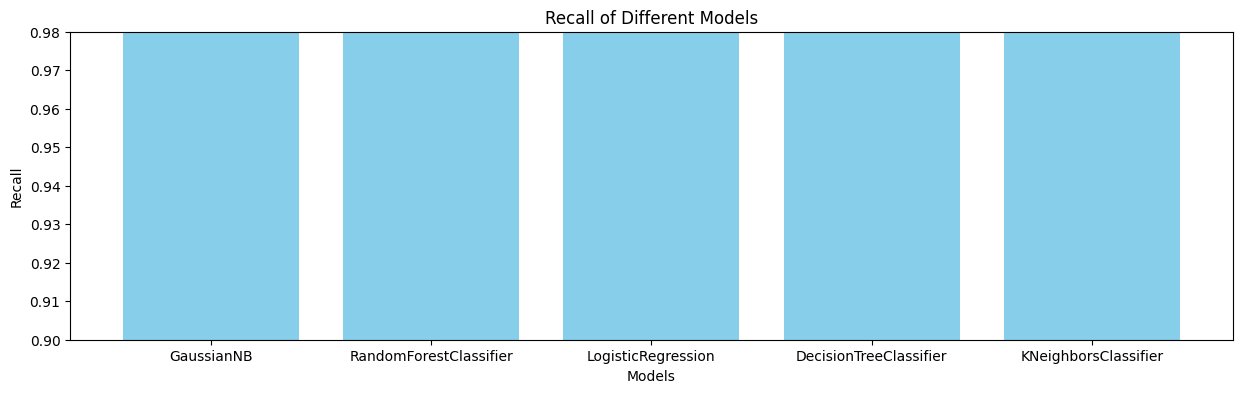

In [24]:
plt.figure(figsize=(15, 4))
plt.bar(model_names, re, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.ylim(0.90, 0.98)  
plt.show()

Result

In KNN and Decision Tree Classifier models, it has the highest value of Recall

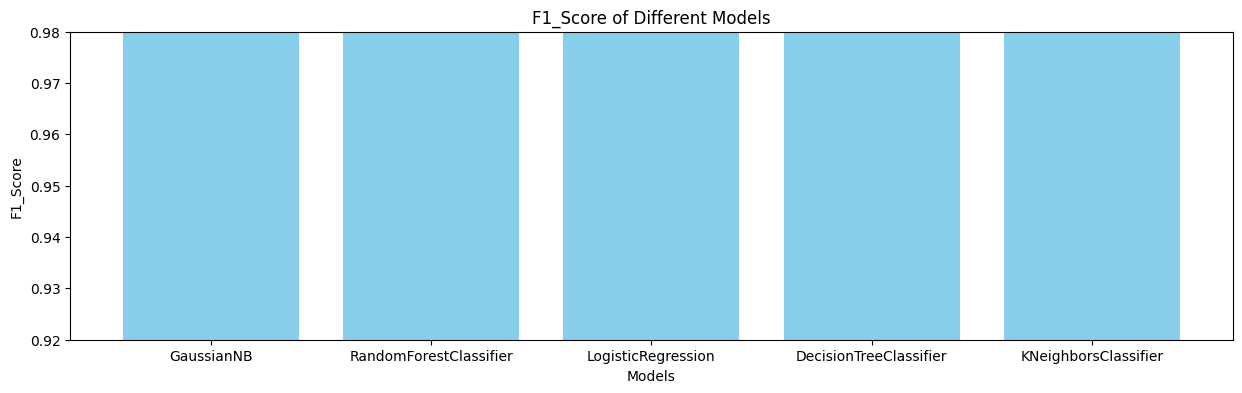

In [25]:
plt.figure(figsize=(15, 4))
plt.bar(model_names, f1, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1_Score')
plt.title('F1_Score of Different Models')
plt.ylim(0.92, 0.98)  
plt.show()

Result

In KNN and Decision Tree Classifier models, it has the highest value of F1_Score

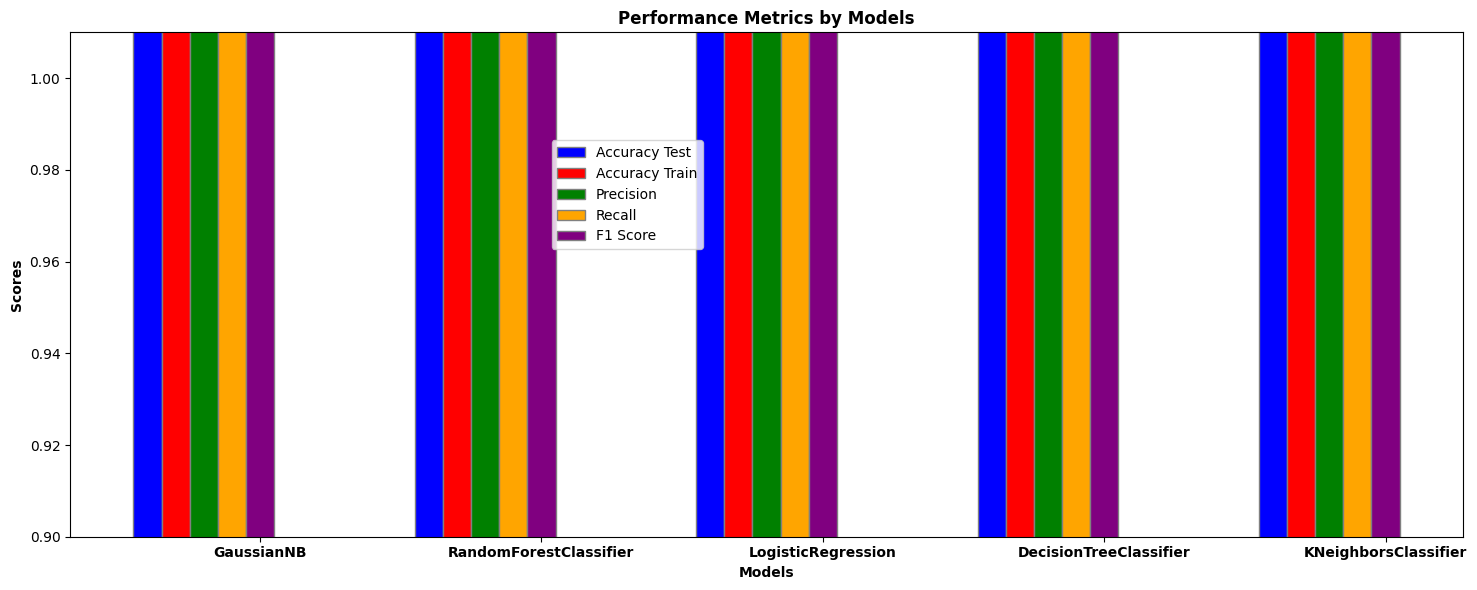

In [26]:
plt.figure(figsize=(15, 6))

barWidth = 0.10
r1 = np.arange(len(mo_df))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, mo_df['Accuracy Test'], color='blue', width=barWidth, edgecolor='grey', label='Accuracy Test')
plt.bar(r2, mo_df['Accuracy Train'], color='red', width=barWidth, edgecolor='grey', label='Accuracy Train')
plt.bar(r3, mo_df['Recall'], color='green', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r4, mo_df['Precision'], color='orange', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r5, mo_df['F1_Score'], color='purple', width=barWidth, edgecolor='grey', label='F1 Score')



plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth*4 for r in range(len(mo_df))], mo_df['Models'], fontweight='bold')
plt.ylabel('Scores', fontweight='bold')

plt.title('Performance Metrics by Models', fontweight='bold')


plt.legend()
plt.legend(bbox_to_anchor=(0.4, 0.8), loc='upper center')
plt.ylim(0.90, 1.01)
plt.tight_layout()
plt.show()

 Result

According to the information we got from the above pots, respectively, KNN and Decision Tree Classifier models are better than the others

In [27]:
def plot_actual_vs_predicted(y_true, y_pred,na):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_true)), y_true, color='b', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.title(f'Actual vs Predictedm in {na}')
    plt.legend()
    plt.show()

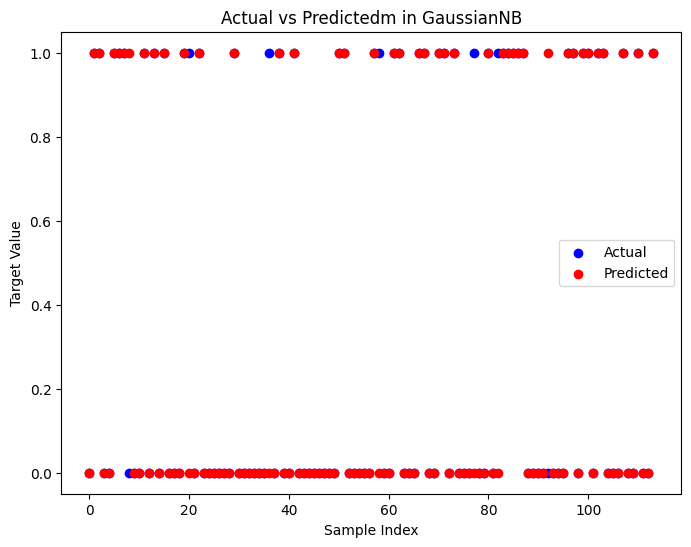

In [28]:
na=model_names[0]
plot_actual_vs_predicted(y_test, y_pred_test_1,na)

 Result

In the plot above, taken from the output of model Naive Bayes, it shows that 5 predictions did not perform well

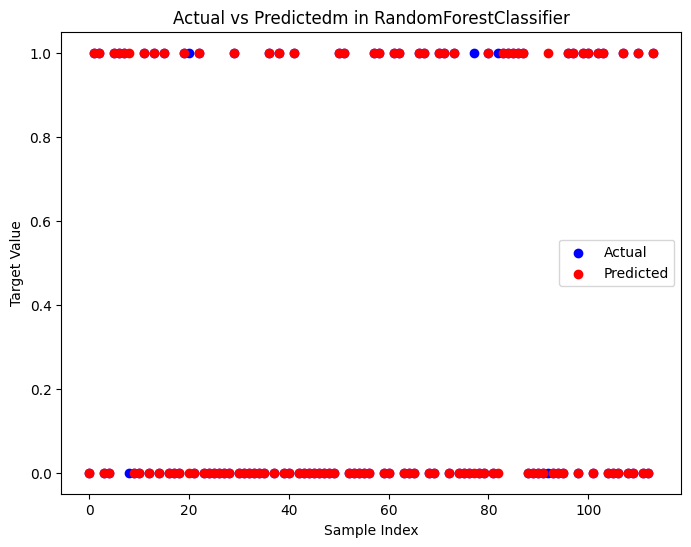

In [29]:
na=model_names[1]
plot_actual_vs_predicted(y_test, y_pred_test_2,na)

Result

In the plot above, which is taken from the output of model Random Forest, it shows that it did not perform the 3 predictions well

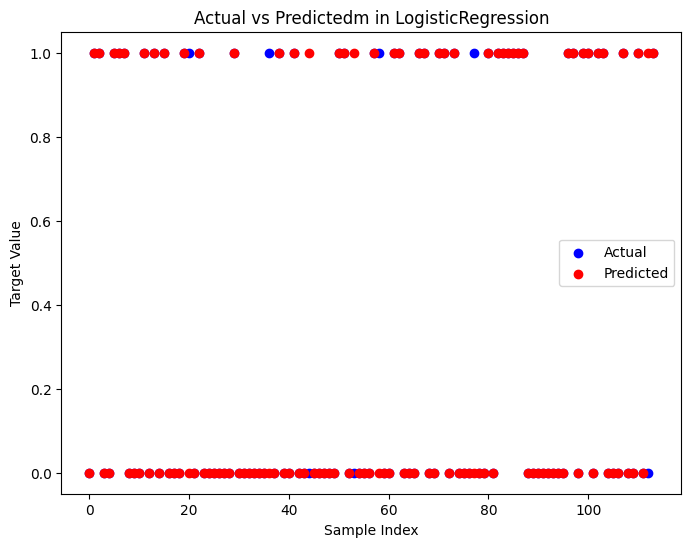

In [30]:
na=model_names[2]
plot_actual_vs_predicted(y_test, y_pred_test_3,na)

💡 Result

In the plot above, which is taken from the output of model LogisticRegression, it shows that it did not perform the 4 predictions well

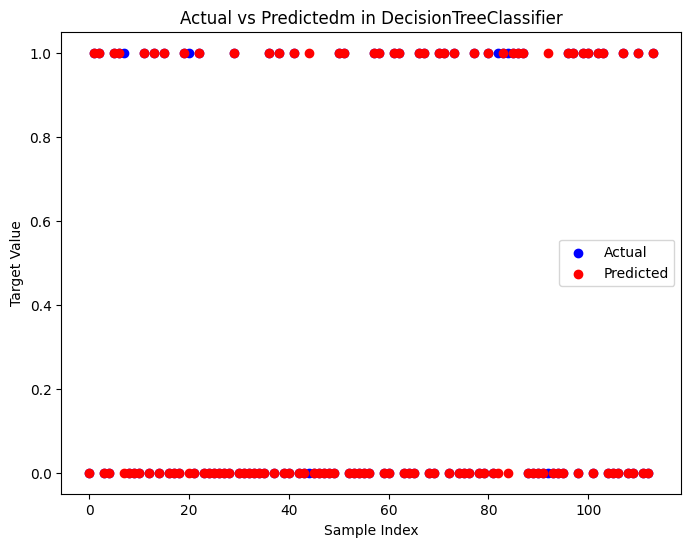

In [31]:
na=model_names[3]
plot_actual_vs_predicted(y_test, y_pred_test_4,na)

💡 Result

In the plot above, which is taken from the output of model DecisionTreeClassifier, it shows that it did not perform the 3 predictions well

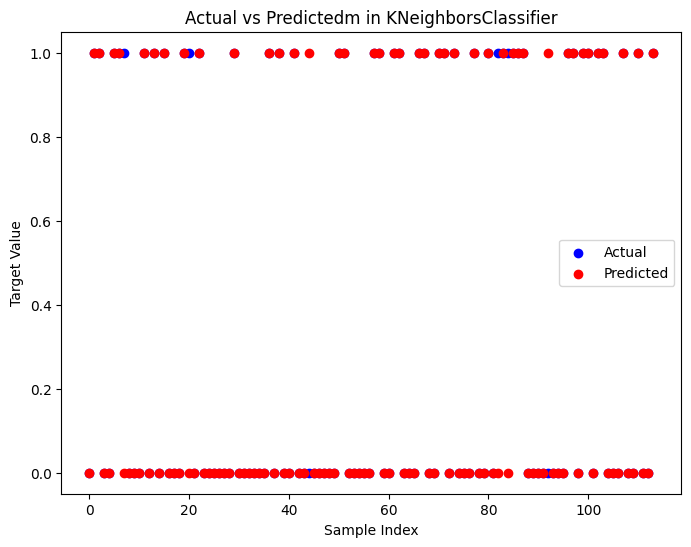

In [32]:
na=model_names[4]
plot_actual_vs_predicted(y_test, y_pred_test_4,na)

Result

In the plot above, which is taken from the output of model KNN, it shows that it did not perform the 3 predictions well

# DecisionTreeRegressor

In [33]:
clf = DecisionTreeRegressor()
clf = clf.fit(X0,y)

In [34]:
number=int(input('Enter a number: '))

In [35]:
list_numbers=[]
for i in range(number):
    print(f'------list {i+1}--------')
    
    num1=float(input('Enter a number Radius: '))
    num2=float(input('Enter a number Texture: '))
    num3=float(input('Enter a number Perimeter: '))
    num4=float(input('Enter a number Area: '))
    num5=float(input('Enter a number Smoothness: '))
    num6=float(input('Enter a number Compactness: '))
    num7=float(input('Enter a number Concavity: '))
    num8=float(input('Enter a number Concave Points: '))
    num9=float(input('Enter a number Symmetry: '))
    num10=float(input('Enter a number Fractal Dimension: '))
    
    lists=[num1,num2,num3,num4,num5,num6,num7,num8,num9,num10]
    list_numbers.append(lists) 

------list 1--------


In [36]:
new_data = list_numbers
answer = clf.predict(new_data)

c:\Users\shaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [37]:
for i in range(len(new_data)):
    if answer[i]==1:
        print(f'Person: {i+1} ==> Malignant')
    elif answer[i]==0:
        print(f'Person: {i+1} ==> Benign')

Person: 1 ==> Malignant
